## GReaT Example with Iris Dataset

In [19]:
import numpy as np
import pandas as pd
import logging
from sklearn import datasets

from utils import set_logging_level
from be_great import GReaT

In [5]:
import matplotlib.pyplot as plt

In [2]:
logger = set_logging_level(logging.INFO)

### Load Data

In [3]:
data = datasets.load_iris(as_frame=True).frame
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
data.columns = ["sepal length", "sepal width", "petal length", "petal width", "target"]

### Create GReaT Model

In [5]:
great = GReaT("distilgpt2",                  # Name of the large language model used (see HuggingFace for more options)
              epochs=50,                     # Number of epochs to train
              save_steps=200,                # Save model weights every x steps
              logging_steps=25,              # Log the loss and learning rate every x steps
              experiment_dir="trainer_iris", # Name of the directory where all intermediate steps are saved
              #lr_scheduler_type="constant", # Specify the learning rate scheduler 
              #learning_rate=5e-5            # Set the inital learning rate
             )

### Start Training

In [6]:
trainer = great.fit(data)

2022-10-12 11:21:53,799 - INFO - Convert data into HuggingFace dataset object... (great.py:71)
2022-10-12 11:21:53,823 - INFO - Create GReaT Trainer... (great.py:76)
2022-10-12 11:21:53,859 - INFO - Start training... (great.py:85)
C:\Users\Kathrin\Anaconda3\envs\be_great\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 150
  Num Epochs = 50
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 950
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` 

Step,Training Loss
25,1.458900
50,0.805000
75,0.711100
100,0.654700
125,0.598900
150,0.585500
175,0.550500
200,0.547300
225,0.536800
250,0.531800


Saving model checkpoint to trainer_iris\checkpoint-200
Configuration saved in trainer_iris\checkpoint-200\config.json
Model weights saved in trainer_iris\checkpoint-200\pytorch_model.bin
tokenizer config file saved in trainer_iris\checkpoint-200\tokenizer_config.json
Special tokens file saved in trainer_iris\checkpoint-200\special_tokens_map.json
Saving model checkpoint to trainer_iris\checkpoint-400
Configuration saved in trainer_iris\checkpoint-400\config.json
Model weights saved in trainer_iris\checkpoint-400\pytorch_model.bin
tokenizer config file saved in trainer_iris\checkpoint-400\tokenizer_config.json
Special tokens file saved in trainer_iris\checkpoint-400\special_tokens_map.json
Saving model checkpoint to trainer_iris\checkpoint-600
Configuration saved in trainer_iris\checkpoint-600\config.json
Model weights saved in trainer_iris\checkpoint-600\pytorch_model.bin
tokenizer config file saved in trainer_iris\checkpoint-600\tokenizer_config.json
Special tokens file saved in train

In [8]:
loss_hist = trainer.state.log_history.copy()
loss_hist.pop()

{'train_runtime': 4095.5678,
 'train_samples_per_second': 1.831,
 'train_steps_per_second': 0.232,
 'total_flos': 66982809600000.0,
 'train_loss': 0.5365628654078434,
 'epoch': 50.0,
 'step': 950}

In [9]:
loss = [x["loss"] for x in loss_hist]
epochs = [x["epoch"] for x in loss_hist]

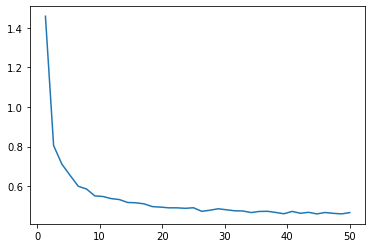

In [10]:
plt.plot(epochs, loss)

### Save Model

In [11]:
great.save("iris")

C:\Users\Kathrin\Anaconda3\envs\be_great\lib\site-packages\be_great\great.py:183: UserWarning: Directory iris already exists and is overwritten now.
  warnings.warn(f"Directory {path} already exists and is overwritten now.")


### Load Model

In [12]:
# great = GReaT.load_from_dir("iris")

### Generate Samples

In [21]:
n_samples = 150

In [22]:
samples = great.sample(n_samples, device="cpu", k=8)

152it [02:39,  1.05s/it]                                                                                               


In [23]:
samples.head()

,sepal length,sepal width,petal length,petal width,target
0,6.1,2.8,5.1,1.8,2
1,5.0,3.0,4.6,1.6,1
2,7.1,2.9,6.3,2.7,2
3,6.3,3.0,4.5,2.0,1
4,5.1,2.9,5.7,1.5,2


In [24]:
samples.to_csv("iris_samples.csv")

We can also influence the distribution of the column on which the generation is conditioned (In the original dataset all three target values (0, 1, 2) have a probability of 33%).

In [17]:
samples_custom = great.sample(n_samples, device="cpu", k=8, start_col="target",
                              start_col_dist={"0": 0.5, "1": 0.5, "2": 0})

24it [00:25,  1.06s/it]                                                                                                


In [18]:
samples_custom.head()

,sepal length,sepal width,petal length,petal width,target
0,5.7,3.1,1.7,0.2,0
1,4.5,3.0,1.4,0.3,0
2,5.9,3.0,4.8,1.8,1
3,5.4,3.6,4.7,1.4,1
4,5.1,3.7,1.5,0.4,0


## Plot Data

Original Data

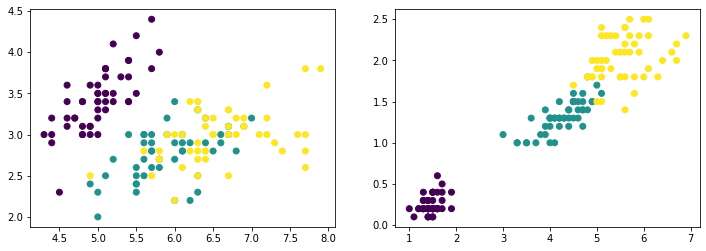

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(data["sepal length"], data["sepal width"], c=data["target"])
ax[1].scatter(data["petal length"], data["petal width"], c=data["target"])

Generated samples

In [20]:
samples = pd.read_csv("iris_samples.csv")

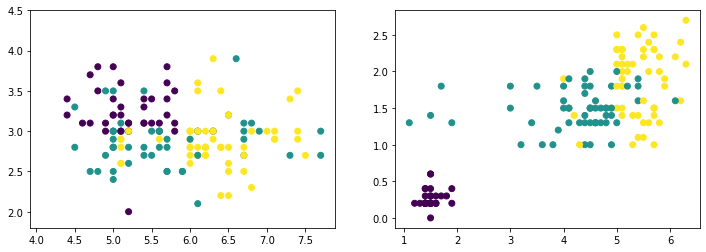

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(samples["sepal length"].astype("float"), samples["sepal width"].astype("float"), c=samples["target"].astype("int"))
ax[0].set_ylim(1.8, 4.5)
ax[1].scatter(samples["petal length"].astype("float"), samples["petal width"].astype("float"), c=samples["target"].astype("int"))
